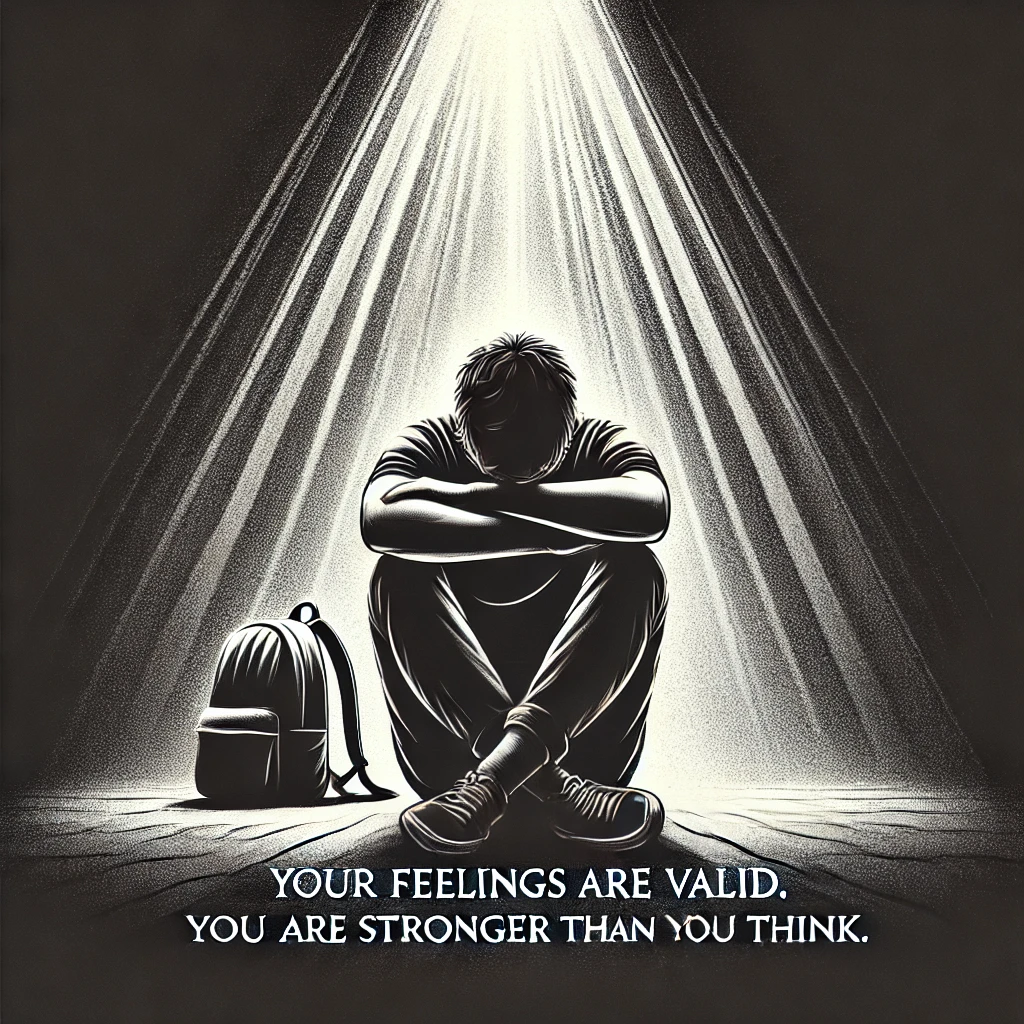

# 1.Loading the dataset: Load the data and import the libraries.


# 2.Data Cleaning:
 **1).Data information.**

**2).Dropping duplicates.**

**3).Renaming the columns.**

**4).Remove the NaN values from the dataset.**


# 3.Data Visualization: Using plots to find relations between the features.


# 4.Data Preprocessing

 **1).Renaming the Sleep Duration**

**2).Gender values have been encoded for better processing:** **Male → 0, Female → 1**. This conversion helps in numerical computations and machine learning models. 

**3).Suicidal Thoughts have been encoded for better processing: **No → 0, Yes → 1**. This conversion helps in numerical computations and machine learning models.**

**4).Family Mental History have been encoded for better processing: **No → 0, Yes → 1**. This conversion helps in numerical computations and machine learaing models**


# 5.Modal

***1.Logistic Regression***

***2.Random Forest Regression***

***3.XGBClassifier***

***4.SVC***

***5.Neural Network***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = 'Student Depression Dataset.csv'
data = pd.read_csv(file_path)
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
len(data[data.duplicated()])


0

In [6]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
data = data.drop(['id','Work Pressure','Job Satisfaction'],axis=1)

In [8]:
data.rename(columns={
    "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
    "Work/Study Hours": "Study Work Hours",
    "Family History of Mental Illness": "Family Mental History"
}, inplace=True)


In [9]:
data['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [10]:
data['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [11]:
data['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [12]:
filtered_cities = data['City'].value_counts()[lambda x: x > 2].index
print(filtered_cities)
data.query('City in @filtered_cities', inplace=True)

Index(['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane',
       'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna',
       'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut',
       'Rajkot', 'Delhi', 'Bangalore', 'Ghaziabad', 'Mumbai', 'Vadodara',
       'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad'],
      dtype='object', name='City')


In [13]:
data.query('Profession == "Student"', inplace=True)

print(data)

       Gender   Age           City Profession  Academic Pressure  CGPA  \
0        Male  33.0  Visakhapatnam    Student                5.0  8.97   
1      Female  24.0      Bangalore    Student                2.0  5.90   
2        Male  31.0       Srinagar    Student                3.0  7.03   
3      Female  28.0       Varanasi    Student                3.0  5.59   
4      Female  25.0         Jaipur    Student                4.0  8.13   
...       ...   ...            ...        ...                ...   ...   
27896  Female  27.0          Surat    Student                5.0  5.75   
27897    Male  27.0       Ludhiana    Student                2.0  9.40   
27898    Male  31.0      Faridabad    Student                3.0  6.61   
27899  Female  18.0       Ludhiana    Student                5.0  6.88   
27900    Male  27.0          Patna    Student                4.0  9.24   

       Study Satisfaction     Sleep Duration Dietary Habits    Degree  \
0                     2.0          5-6

In [14]:
data.drop(columns=['Profession'], inplace=True)

In [15]:
data['Sleep Duration'].value_counts(normalize=True)

Sleep Duration
Less than 5 hours    0.297946
7-8 hours            0.263145
5-6 hours            0.221628
More than 8 hours    0.216636
Others               0.000646
Name: proportion, dtype: float64

In [16]:
data.query('`Sleep Duration` != "Others"', inplace=True)


In [17]:
data['Dietary Habits'].value_counts(normalize=True)

Dietary Habits
Unhealthy    0.369726
Moderate     0.355675
Healthy      0.274168
Others       0.000431
Name: proportion, dtype: float64

In [18]:
data.query('`Dietary Habits` != "Others"', inplace=True)

In [19]:
dummies = pd.get_dummies(data['Dietary Habits'], dtype=int)
data = pd.concat([data, dummies], axis=1)
data.drop(columns=['Dietary Habits'], inplace=True)

In [20]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,Depression,Healthy,Moderate,Unhealthy
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,B.Pharm,Yes,3.0,1.0,No,1,1,0,0
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,BSc,No,3.0,2.0,Yes,0,0,1,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,BA,No,9.0,1.0,Yes,0,1,0,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,BCA,Yes,4.0,5.0,Yes,1,0,1,0
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,M.Tech,Yes,1.0,1.0,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,Class 12,Yes,7.0,1.0,Yes,0,0,0,1
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,MSc,No,0.0,3.0,Yes,0,1,0,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,MD,No,12.0,2.0,No,0,0,0,1
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Class 12,Yes,10.0,5.0,No,1,1,0,0


In [21]:
data['Degree'].value_counts()

Degree
Class 12    6074
B.Ed        1859
B.Com       1503
B.Arch      1475
BCA         1429
MSc         1183
B.Tech      1151
MCA         1039
M.Tech      1019
BHM          921
BSc          883
M.Ed         817
B.Pharm      808
M.Com        733
BBA          695
MBBS         694
LLB          669
BE           608
BA           594
M.Pharm      580
MD           568
MBA          560
MA           542
PhD          519
LLM          480
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [22]:
data = data.loc[data["Degree"] != "Others"]


In [23]:
def categorize_education(degree):
    if degree == "Class 12":
        return 'secondary_education'
    elif degree in ["PhD", "MSc", "MHM", "ME", "MD", "MCA", "MBBS", "MBA", "MA",
                    "M.Tech", "M.Pharm", "M.Ed", "M.Com", "LLM"]:
        return 'postgraduate_degree'
    elif degree in ["LLB", "BSc", "BHM", "BE", "BCA", "BBA", "BA", "B.Tech",
                    "B.Pharm", "B.Ed", "B.Com", "B.Arch"]:
        return 'undergraduate_degree'
    else:
        return 'others'  # ✅ Default value rakho taake None na aaye

# ✅ Apply changes with .loc to avoid SettingWithCopyWarning
data.loc[:, "Degree"] = data["Degree"].apply(categorize_education).astype('object')


In [24]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,Depression,Healthy,Moderate,Unhealthy
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,undergraduate_degree,Yes,3.0,1.0,No,1,1,0,0
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,undergraduate_degree,No,3.0,2.0,Yes,0,0,1,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,undergraduate_degree,No,9.0,1.0,Yes,0,1,0,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,undergraduate_degree,Yes,4.0,5.0,Yes,1,0,1,0
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,postgraduate_degree,Yes,1.0,1.0,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,secondary_education,Yes,7.0,1.0,Yes,0,0,0,1
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,postgraduate_degree,No,0.0,3.0,Yes,0,1,0,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,postgraduate_degree,No,12.0,2.0,No,0,0,0,1
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,secondary_education,Yes,10.0,5.0,No,1,1,0,0


In [25]:
data['Suicidal Thoughts'].value_counts(normalize=True)

Suicidal Thoughts
Yes    0.632636
No     0.367364
Name: proportion, dtype: float64

In [26]:
data['Family Mental History'].value_counts(normalize=True)

Family Mental History
No     0.515857
Yes    0.484143
Name: proportion, dtype: float64

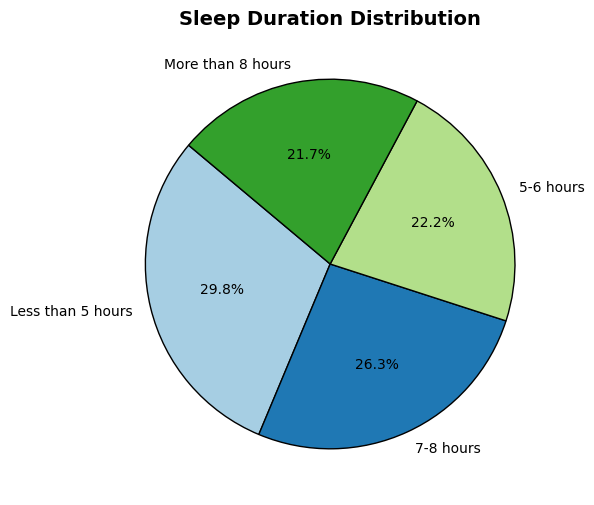

In [27]:
# Sleep Duration count
sd_counts = data['Sleep Duration'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sd_counts, labels=sd_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Sleep Duration Distribution', fontsize=14, fontweight='bold')

# Show Plot
plt.show()

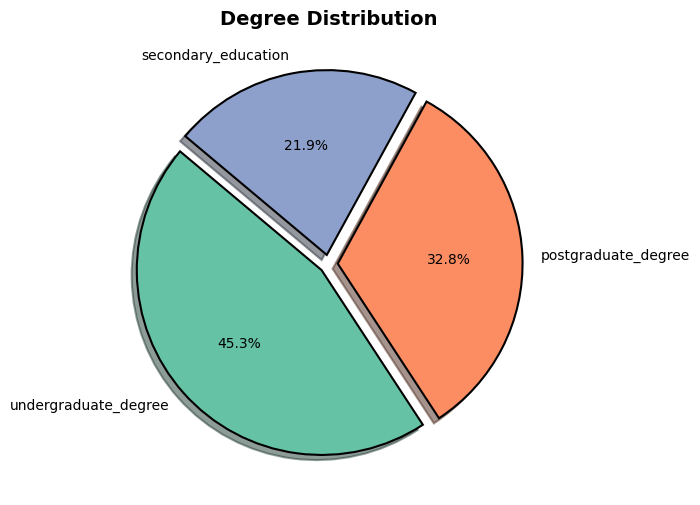

In [28]:
# Degree distribution count
degree_counts = data['Degree'].value_counts()

# Define colors and explode for better visibility
colors = plt.cm.Set2.colors  # Soft color palette
explode = [0.05] * len(degree_counts)  # Slightly separate all slices

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, explode=explode, shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Better title
plt.title('Degree Distribution', fontsize=14, fontweight='bold')

# Show plot
plt.show()


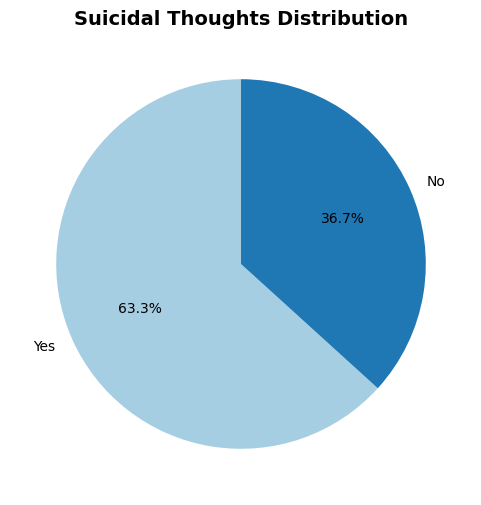

In [29]:
# Count values for ST column
st_counts = data['Suicidal Thoughts'].value_counts()

# Plot
plt.figure(figsize=(6, 6))  # 🔹 Figure size adjust kiya
plt.pie(st_counts, labels=st_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors, startangle=90)

# Title change kiya
plt.title('Suicidal Thoughts Distribution', fontsize=14, fontweight='bold')

# Show plot
plt.show()


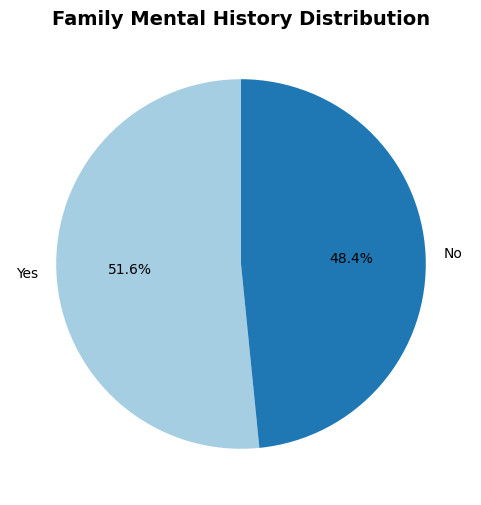

In [30]:
# Count values for ST column
fm_counts = data['Family Mental History'].value_counts()

# Plot
plt.figure(figsize=(6, 6))  # 🔹 Figure size adjust kiya
plt.pie(fm_counts, labels=st_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors, startangle=90)

# Title change kiya
plt.title('Family Mental History Distribution', fontsize=14, fontweight='bold')

# Show plot
plt.show()


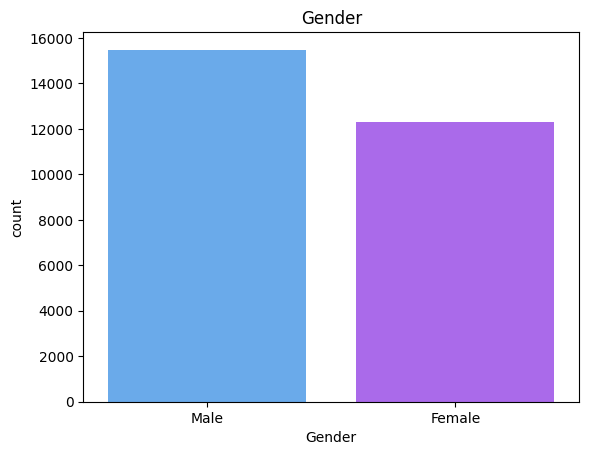

In [31]:
sns.countplot(x='Gender', hue='Gender', data=data, palette='cool' , legend=False)
plt.title('Gender')
plt.show()

In [32]:
values = data["Age"].value_counts().iloc[:10]


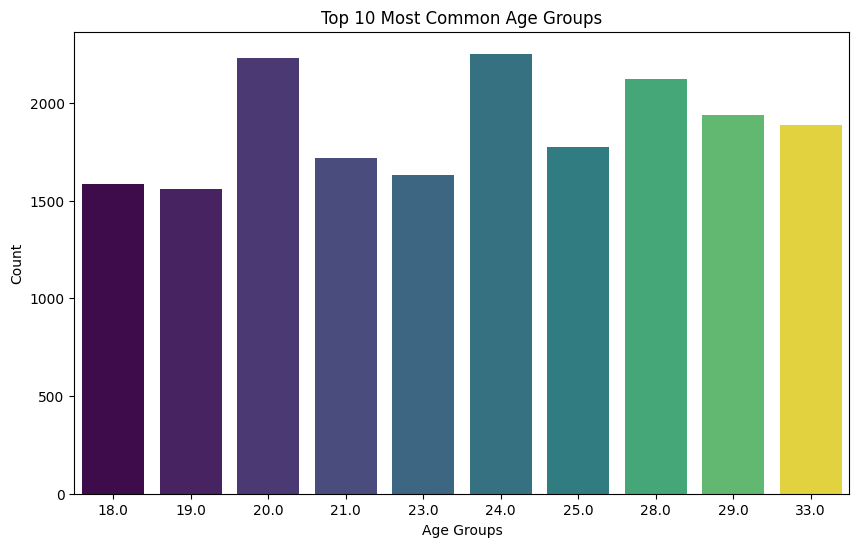

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=values.index, y=values.values, hue=values.index, dodge=False, palette="viridis", legend=False)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Top 10 Most Common Age Groups")
plt.show()


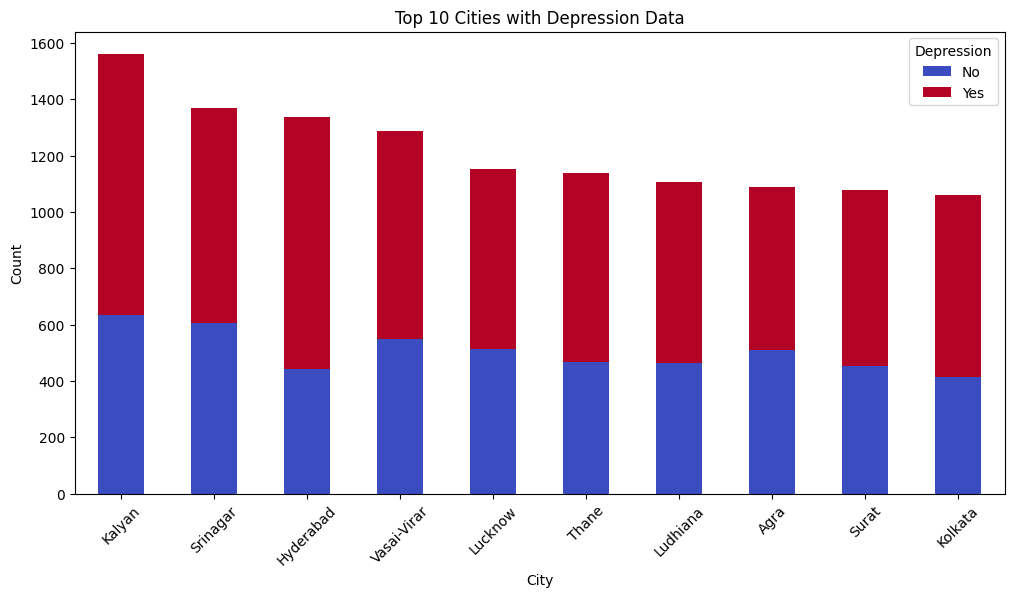

In [34]:
depression_by_city = data.groupby("City")["Depression"].value_counts().unstack()


top_10_cities = depression_by_city.sum(axis=1).nlargest(10).index


depression_top_10 = depression_by_city.loc[top_10_cities]

depression_top_10.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Top 10 Cities with Depression Data")
plt.legend(title="Depression", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()


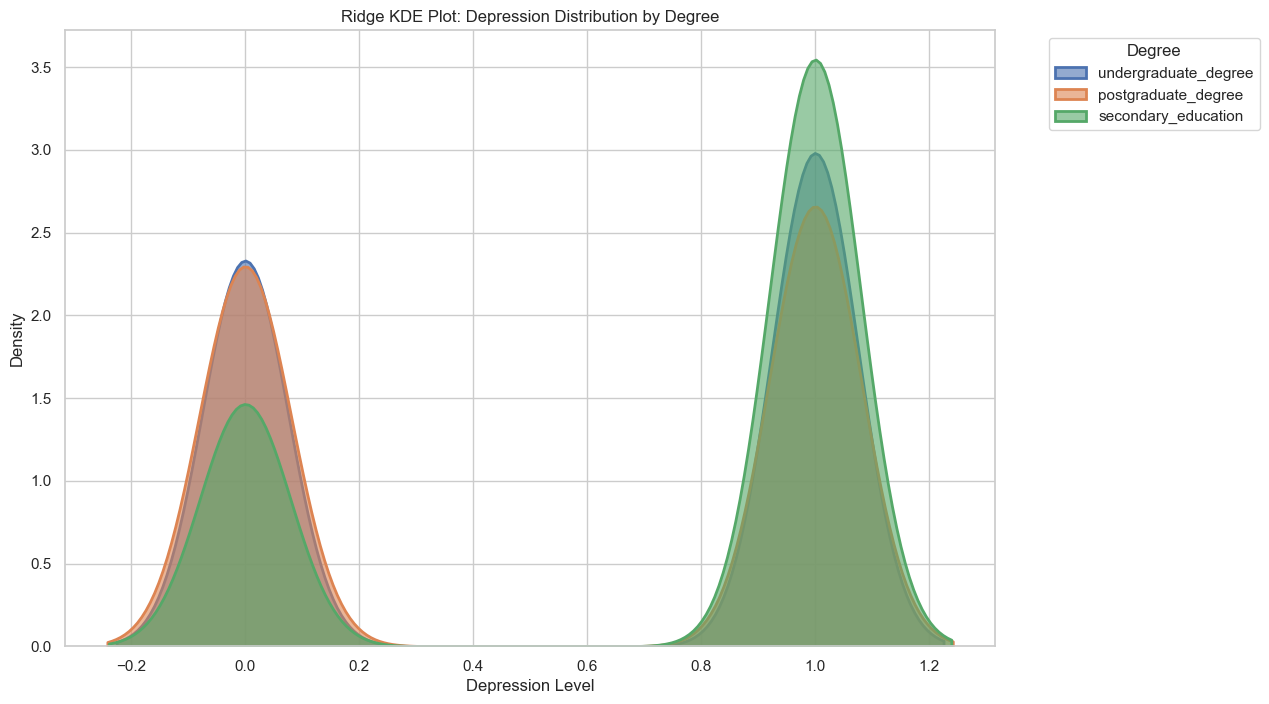

In [35]:
# Top 10 Degrees जिनमें सबसे ज्यादा students हैं
top_degrees = data["Degree"].value_counts().index[:10]
filtered_data = data[data["Degree"].isin(top_degrees)]

# Ridge Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Unique degrees को loop करके KDE प्लॉट बनाएंगे
for i, degree in enumerate(top_degrees):
    subset = filtered_data[filtered_data["Degree"] == degree]
    sns.kdeplot(subset["Depression"], fill=True, alpha=0.6, linewidth=2, label=degree)

plt.xlabel("Depression Level")
plt.ylabel("Density")
plt.title("Ridge KDE Plot: Depression Distribution by Degree")
plt.legend(title="Degree", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [36]:
rename_sd_variable = {
    'Less than 5 hours': 'less_than_five_hours',
    '7-8 hours': 'seven_eight_hours',
    '5-6 hours': 'five_six_hours',
    'More than 8 hours': 'more_than_eight_five_six_hours'}

data['Sleep Duration'] = data['Sleep Duration'].map(rename_sd_variable)


C:\Users\Arman\AppData\Local\Temp\ipykernel_6268\1648026720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sleep Duration'] = data['Sleep Duration'].map(rename_sd_variable)


In [37]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,Depression,Healthy,Moderate,Unhealthy
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,five_six_hours,undergraduate_degree,Yes,3.0,1.0,No,1,1,0,0
1,Female,24.0,Bangalore,2.0,5.90,5.0,five_six_hours,undergraduate_degree,No,3.0,2.0,Yes,0,0,1,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,less_than_five_hours,undergraduate_degree,No,9.0,1.0,Yes,0,1,0,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,seven_eight_hours,undergraduate_degree,Yes,4.0,5.0,Yes,1,0,1,0
4,Female,25.0,Jaipur,4.0,8.13,3.0,five_six_hours,postgraduate_degree,Yes,1.0,1.0,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,five_six_hours,secondary_education,Yes,7.0,1.0,Yes,0,0,0,1
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,less_than_five_hours,postgraduate_degree,No,0.0,3.0,Yes,0,1,0,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,five_six_hours,postgraduate_degree,No,12.0,2.0,No,0,0,0,1
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,less_than_five_hours,secondary_education,Yes,10.0,5.0,No,1,1,0,0


In [38]:
dummies = pd.get_dummies(data['Sleep Duration'], dtype=int)
data = pd.concat([data, dummies], axis=1)
data.drop(columns=['Sleep Duration'], inplace=True)


In [39]:
dummies = pd.get_dummies(data['Degree'], dtype=int)
data = pd.concat([data, dummies], axis=1)
data.drop(columns=['Degree'], inplace=True)

In [40]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,...,Healthy,Moderate,Unhealthy,five_six_hours,less_than_five_hours,more_than_eight_five_six_hours,seven_eight_hours,postgraduate_degree,secondary_education,undergraduate_degree
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,Yes,3.0,1.0,No,...,1,0,0,1,0,0,0,0,0,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,No,3.0,2.0,Yes,...,0,1,0,1,0,0,0,0,0,1
2,Male,31.0,Srinagar,3.0,7.03,5.0,No,9.0,1.0,Yes,...,1,0,0,0,1,0,0,0,0,1
3,Female,28.0,Varanasi,3.0,5.59,2.0,Yes,4.0,5.0,Yes,...,0,1,0,0,0,0,1,0,0,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,Yes,1.0,1.0,No,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,Yes,7.0,1.0,Yes,...,0,0,1,1,0,0,0,0,1,0
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,No,0.0,3.0,Yes,...,1,0,0,0,1,0,0,1,0,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,No,12.0,2.0,No,...,0,0,1,1,0,0,0,1,0,0
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,Yes,10.0,5.0,No,...,1,0,0,0,1,0,0,0,1,0


In [41]:
data.drop(columns=['City'], inplace=True)

In [42]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [43]:
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,Depression,Healthy,Moderate,Unhealthy,five_six_hours,less_than_five_hours,more_than_eight_five_six_hours,seven_eight_hours,postgraduate_degree,secondary_education,undergraduate_degree
0,0,33.0,5.0,8.97,2.0,Yes,3.0,1.0,No,1,1,0,0,1,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,No,3.0,2.0,Yes,0,0,1,0,1,0,0,0,0,0,1
2,0,31.0,3.0,7.03,5.0,No,9.0,1.0,Yes,0,1,0,0,0,1,0,0,0,0,1
3,1,28.0,3.0,5.59,2.0,Yes,4.0,5.0,Yes,1,0,1,0,0,0,0,1,0,0,1
4,1,25.0,4.0,8.13,3.0,Yes,1.0,1.0,No,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,5.75,5.0,Yes,7.0,1.0,Yes,0,0,0,1,1,0,0,0,0,1,0
27897,0,27.0,2.0,9.40,3.0,No,0.0,3.0,Yes,0,1,0,0,0,1,0,0,1,0,0
27898,0,31.0,3.0,6.61,4.0,No,12.0,2.0,No,0,0,0,1,1,0,0,0,1,0,0
27899,1,18.0,5.0,6.88,2.0,Yes,10.0,5.0,No,1,1,0,0,0,1,0,0,0,1,0


In [44]:
data['Suicidal Thoughts'] = data['Suicidal Thoughts'].astype(str)

data['Suicidal Thoughts'] = data['Suicidal Thoughts'].str.strip().str.lower()

mapping_dict = {'yes': 0, 'no': 1}
data['Suicidal Thoughts'] = data['Suicidal Thoughts'].map(mapping_dict)

print("NaN count:", data['Suicidal Thoughts'].isna().sum())

print("Unique values after mapping:", data['Suicidal Thoughts'].unique())


NaN count: 0
Unique values after mapping: [0 1]


In [45]:
data['Family Mental History'] = data['Family Mental History'].astype(str)

data['Family Mental History'] = data['Family Mental History'].str.strip().str.lower()

mapping_dict = {'yes': 0, 'no': 1}
data['Family Mental History'] = data['Family Mental History'].map(mapping_dict)

print("NaN count:", data['Family Mental History'].isna().sum())

print("Unique values after mapping:", data['Family Mental History'].unique())


NaN count: 0
Unique values after mapping: [1 0]


In [46]:
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Study Work Hours,Financial Stress,Family Mental History,Depression,Healthy,Moderate,Unhealthy,five_six_hours,less_than_five_hours,more_than_eight_five_six_hours,seven_eight_hours,postgraduate_degree,secondary_education,undergraduate_degree
0,0,33.0,5.0,8.97,2.0,0,3.0,1.0,1,1,1,0,0,1,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,3.0,2.0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,31.0,3.0,7.03,5.0,1,9.0,1.0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,28.0,3.0,5.59,2.0,0,4.0,5.0,0,1,0,1,0,0,0,0,1,0,0,1
4,1,25.0,4.0,8.13,3.0,0,1.0,1.0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,5.75,5.0,0,7.0,1.0,0,0,0,0,1,1,0,0,0,0,1,0
27897,0,27.0,2.0,9.40,3.0,1,0.0,3.0,0,0,1,0,0,0,1,0,0,1,0,0
27898,0,31.0,3.0,6.61,4.0,1,12.0,2.0,1,0,0,0,1,1,0,0,0,1,0,0
27899,1,18.0,5.0,6.88,2.0,0,10.0,5.0,1,1,1,0,0,0,1,0,0,0,1,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27779 entries, 0 to 27900
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          27779 non-null  int64  
 1   Age                             27779 non-null  float64
 2   Academic Pressure               27779 non-null  float64
 3   CGPA                            27779 non-null  float64
 4   Study Satisfaction              27779 non-null  float64
 5   Suicidal Thoughts               27779 non-null  int64  
 6   Study Work Hours                27779 non-null  float64
 7   Financial Stress                27776 non-null  float64
 8   Family Mental History           27779 non-null  int64  
 9   Depression                      27779 non-null  int64  
 10  Healthy                         27779 non-null  int64  
 11  Moderate                        27779 non-null  int64  
 12  Unhealthy                       27779

# Machine Learning

In [48]:
X = data.drop(['Depression'], axis = 1)
y = data['Depression']

In [49]:
X.shape

(27779, 19)

In [50]:
y.shape

(27779,)

In [51]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


##  Splitting the Dataset

In [52]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [53]:
X_train.shape

(22223, 19)

In [54]:
y_train.shape

(22223,)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train

array([[-0.89191244,  0.03197505,  0.62423641, ...,  1.43430448,
        -0.52676141, -0.91499668],
       [-0.89191244,  0.43965231,  1.34898463, ...,  1.43430448,
        -0.52676141, -0.91499668],
       [ 1.12118629, -0.78337947, -0.10051181, ..., -0.69720204,
        -0.52676141,  1.09290015],
       ...,
       [-0.89191244, -0.78337947, -1.55000825, ..., -0.69720204,
        -0.52676141,  1.09290015],
       [ 1.12118629, -1.59873399, -0.10051181, ..., -0.69720204,
         1.89839268, -0.91499668],
       [-0.89191244,  0.84732957,  1.34898463, ..., -0.69720204,
        -0.52676141,  1.09290015]], shape=(22223, 19))

In [57]:
X_test

array([[-0.89191244,  1.66268409, -0.10051181, ..., -0.69720204,
        -0.52676141,  1.09290015],
       [-0.89191244, -0.9872181 , -1.55000825, ..., -0.69720204,
        -0.52676141,  1.09290015],
       [ 1.12118629, -0.17186358,  1.34898463, ..., -0.69720204,
        -0.52676141,  1.09290015],
       ...,
       [ 1.12118629, -0.17186358,  0.62423641, ...,  1.43430448,
        -0.52676141, -0.91499668],
       [ 1.12118629, -1.19105673,  1.34898463, ..., -0.69720204,
         1.89839268, -0.91499668],
       [ 1.12118629,  0.23581368, -1.55000825, ..., -0.69720204,
        -0.52676141,  1.09290015]], shape=(5556, 19))

**Note:** Missing values in the dataset have been handled using `SimpleImputer` from `sklearn.impute`. The **mean** strategy is used to replace missing values with the column's mean. This ensures consistency in both training and test data.  


In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Apply same transformation to test data


# a) Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lo = LogisticRegression()
lo.fit(X_train,y_train)
y_pred=lo.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
accuracy_lo = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [60]:
print("Logistic Regression Model Evaluation\n")
print(f"Accuracy: {accuracy_lo:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Logistic Regression Model Evaluation

Accuracy: 0.8521

Confusion Matrix:
[[1836  457]
 [ 365 2898]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2293
           1       0.86      0.89      0.88      3263

    accuracy                           0.85      5556
   macro avg       0.85      0.84      0.85      5556
weighted avg       0.85      0.85      0.85      5556



# b) Random Forest 

In [61]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
accuracy_RForest = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [62]:
print("RandomForest Regressor Model Evaluation\n")
print(f"Accuracy: {accuracy_RForest:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


RandomForest Regressor Model Evaluation

Accuracy: 0.8521

Confusion Matrix:
[[1836  457]
 [ 365 2898]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2293
           1       0.86      0.89      0.88      3263

    accuracy                           0.85      5556
   macro avg       0.85      0.84      0.85      5556
weighted avg       0.85      0.85      0.85      5556



# c) XGBClassifier

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss')

# Train the Model
xgb.fit(X_train, y_train)

# Make Predictions
y_pred = xgb.predict(X_test)

# Evaluate Model Performance
accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("XGBoost Model Evaluation\n")
print(f"Accuracy: {accuracy_xgb:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


XGBoost Model Evaluation

Accuracy: 0.8418

Confusion Matrix:
[[1828  465]
 [ 414 2849]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2293
           1       0.86      0.87      0.87      3263

    accuracy                           0.84      5556
   macro avg       0.84      0.84      0.84      5556
weighted avg       0.84      0.84      0.84      5556



# d) SVM

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize SVM Classifier
svm = SVC(kernel='rbf')  # 'linear', 'poly', 'rbf', 'sigmoid' available

# Train the Model
svm.fit(X_train, y_train)

# Make Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate Model Performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)


In [65]:
print("SVM Model Evaluation\n")
print(f"Accuracy: {accuracy_svm:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

SVM Model Evaluation

Accuracy: 0.8510

Confusion Matrix:
[[1819  474]
 [ 354 2909]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2293
           1       0.86      0.89      0.88      3263

    accuracy                           0.85      5556
   macro avg       0.85      0.84      0.85      5556
weighted avg       0.85      0.85      0.85      5556



# e) Neural Network

In [66]:
import tensorflow as tf
from tensorflow import keras


In [67]:
# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate Model Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Display Accuracy
test_acc


C:\Users\Arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7958 - loss: 0.4567 - val_accuracy: 0.8492 - val_loss: 0.3465
Epoch 2/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8488 - loss: 0.3538 - val_accuracy: 0.8513 - val_loss: 0.3429
Epoch 3/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8463 - loss: 0.3505 - val_accuracy: 0.8526 - val_loss: 0.3410
Epoch 4/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8448 - loss: 0.3582 - val_accuracy: 0.8533 - val_loss: 0.3425
Epoch 5/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8521 - loss: 0.3433 - val_accuracy: 0.8530 - val_loss: 0.3417
Epoch 6/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8412 - loss: 0.3508 - val_accuracy: 0.8531 - val_loss: 0.3418
Epoch 7/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8474 - loss: 0.3526 - val_accuracy: 0.8522 - val_loss: 0.3400
Epoch 8/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8459 - loss: 0.3530 - 

0.852051854133606

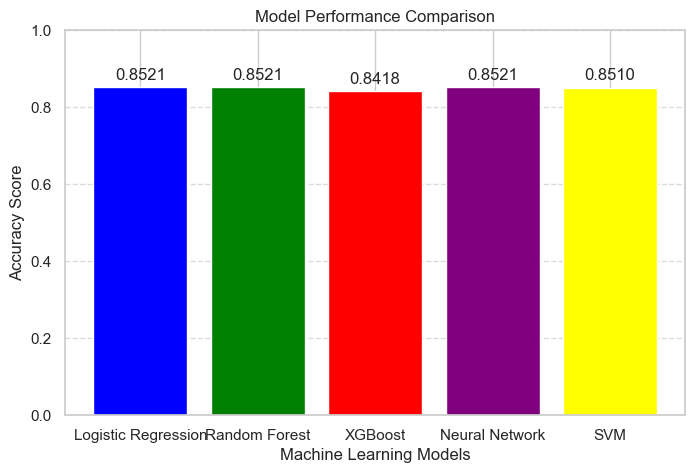

In [68]:
# Accuracy scores of different models
models = ["Logistic Regression", "Random Forest", "XGBoost", "Neural Network","SVM"]
accuracies = [accuracy_lo, accuracy_RForest, accuracy_xgb, test_acc, accuracy_svm]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple','yellow'])

# Labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12)

# Show plot
plt.show()
